# Uncertainties

Generally

---

## Notebook admin

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import norm

# Set NumPy and Pandas to print 4 decimal places
np.set_printoptions(precision=4)
pd.set_option("display.precision", 4)

---

# Population uncertainties

Use the [population proportion confidence interval](https://en.wikipedia.org/wiki/Population_proportion):

$$ CI = \hat{p} \pm z^* \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} $$

for sample probability $\hat{p}$, scale factor relating to confidence interval $z^*$, and sample population size $n$ out of the full population of size $N$.

The conditions for inference (i.e. the requirements for this formula to be statistically valid) are:
    
+ $n \cdot \hat{p} \geq 10$
+ $n \cdot (1-\hat{p}) \geq 10$
+ $N \geq 10 n$

$z^*$ is calculated using the confidence level $C$:

$$ z^* = \frac{1-C}{2} $$

In [2]:
def calculate_pm_confint(p, n, zstar):
    return zstar * np.sqrt( (p*(1-p))/n )

In [46]:
def calculate_zstar(C):
    # C is the area under the normal distribution that we want. 
    # Define some proportion "1-C" from the centre of the normal dist:
    area_under_both_tails = 1-C
    # We want to only exclude the right-hand tail instead of both tails. 
    # So halve this proportion:
    area_under_tail = area_under_both_tails*0.5
    # Probability density function is called "ppf". 
    # Find zstar, which is where the area under the normal distribution
    # to the right of zstar is equal to tail_area.
    zstar = norm.ppf(1-area_under_tail)
    return zstar

In [47]:
C = 0.95
zstar = calculate_zstar(C)

zstar

1.959963984540054

In [30]:
n_patients_total_pre_stroke_nlvo = 184761
dist_pre_stroke_nlvo = np.array(
    [0.582881, 0.162538, 0.103440, 0.102223, 0.041973, 0.006945, 0.0])

In [31]:
n_patients_total_pre_stroke_lvo = 61915
dist_pre_stroke_lvo = np.array([
    0.417894, 0.142959, 0.118430, 0.164211, 0.113775, 0.042731, 0.0])

In [32]:
n_patients_total_notreatment_lvo = 645
dist_notreatment_lvo = (
    np.array([5.0, 7.9, 13.6, 16.4, 24.7, 13.5, 18.9])/100.0)

In [33]:
n_patients_total_notreatment_nlvo_lvo = 1820
dist_notreatment_nlvo_lvo = np.array(
    [0.1486, 0.2022, 0.1253, 0.1397, 0.1806, 0.0861, 0.1175])

Problem 0 6
Problem 1 6


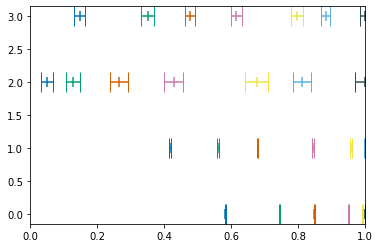

In [45]:
dists = [
    dist_pre_stroke_nlvo,
    dist_pre_stroke_lvo,
    dist_notreatment_lvo,
    dist_notreatment_nlvo_lvo,
]
n_patients = [
    n_patients_total_pre_stroke_nlvo,
    n_patients_total_pre_stroke_lvo,
    n_patients_total_notreatment_lvo,
    n_patients_total_notreatment_nlvo_lvo,
]

colour_list = ['#0072B2', '#009E73', '#D55E00', '#CC79A7', 
               '#F0E442', '#56B4E9', 'DarkSlateGray']


for d, dist in enumerate(dists):
    dist_cumsum = np.cumsum(dist)
    n = n_patients[d]
    confints = []
    
    for i,p in enumerate(dist):
        if n*p < 10:
            print('Problem', d, i)
        if n*(1-p)<10:
            print('Problem', d, i)
        
        pm_confint = calculate_pm_confint(p, n, zstar)
        confints.append(pm_confint)
        plt.scatter(dist_cumsum[i], d, marker='|', s=100, color=colour_list[i])
        plt.errorbar(dist_cumsum[i],d, xerr=pm_confint, 
                     color=colour_list[i], capsize=10)

plt.xlim(0,1)
plt.show()